In [1]:
import numpy as np
import pandas as pd
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
from rdkit import Chem

In [3]:
dataset_ML = pd.read_csv("/Users/junjiehu/Desktop/Tau-SAAE.csv")
dataset_QML = pd.read_csv("/Users/junjiehu/Desktop/Tau_QSAAE.csv")
dataset_template=pd.read_csv("/Users/junjiehu/Desktop/Tau_template.csv")

In [4]:
mols_QML = []
for i in range(len(dataset_QML)):
    data = dataset_QML.iloc[i,]
    mol_data = Chem.MolFromSmiles(data['smiles'])
    mols_QML.append(mol_data)

[20:17:25] SMILES Parse Error: extra open parentheses for input: 'O=C(NCc1ccccc1)N1CCN(c2ccc3c(c4c([nH]c4ccccc43)C2)CC1'
[20:17:25] Can't kekulize mol.  Unkekulized atoms: 7 8 10
[20:17:25] SMILES Parse Error: extra open parentheses for input: 'O=C(Nc1ccc(OCC(=O)N2CCOCC2)c(F)c1'
[20:17:25] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10 11 21 22 23
[20:17:25] SMILES Parse Error: extra open parentheses for input: 'CN(C(=O)Cn1ccc2nc(N3CCC4(CCCC(C)CC4)[nH]c3=O)c2N1'
[20:17:25] SMILES Parse Error: unclosed ring for input: 'O=C(Nc1ccn(-c2ncccc2Cl)c1-c1nc(n1)C1(CC1)OCCO1)c1ccccc1'
[20:17:25] Can't kekulize mol.  Unkekulized atoms: 4 11 12 13 14
[20:17:25] SMILES Parse Error: extra close parentheses while parsing: O=C(CN1Sc2ccccc2N1)N1CC(c2ccc(Br)cc2)CC1)c1ccc2cn[nH]c2c1
[20:17:25] SMILES Parse Error: Failed parsing SMILES 'O=C(CN1Sc2ccccc2N1)N1CC(c2ccc(Br)cc2)CC1)c1ccc2cn[nH]c2c1' for input: 'O=C(CN1Sc2ccccc2N1)N1CC(c2ccc(Br)cc2)CC1)c1ccc2cn[nH]c2c1'
[20:17:25] SMILES Parse Error: unclose

In [5]:
mols_ML = []
for i in range(len(dataset_ML)):
    data = dataset_ML.iloc[i,]
    mol_data = Chem.MolFromSmiles(data['smiles'])
    mols_ML.append(mol_data)

[20:17:29] SMILES Parse Error: unclosed ring for input: 'CN1CCC2(CCCN(C(=O)CCc3ccccc3)CC3(CC2)CN(C(=O)CO)CC1)NCc1ccccc1'
[20:17:29] SMILES Parse Error: ring closure 1 duplicates bond between atom 21 and atom 22 for input: 'COc1ccc2c(c1)C(C(C#N)C(=O)CCCC#N)CCN1c1ccccc1OC2'
[20:17:29] Can't kekulize mol.  Unkekulized atoms: 6 7 10 12 14
[20:17:29] SMILES Parse Error: unclosed ring for input: 'COc1ccc2cc(C(=O)NC(c3ncccn3)CCCC3)ccc2n1N'
[20:17:29] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 23
[20:17:29] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 25
[20:17:29] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 9 10 11 12 16 17 18 19 20 22 23 24
[20:17:29] SMILES Parse Error: unclosed ring for input: 'O=C(CCc1ccc3c(c1)N(C(=O)c1ccccc1)NC(N1)OCCO1)c1cccnc1'
[20:17:29] SMILES Parse Error: extra open parentheses for input: 'CCS(=O)(=O)c1cccc2c1nc(N1CCN(C(=O)C3CC3)C(=O)C1(C)Cc1ccc(C(C)(C)C)cc12'
[20:17:29] Can't kekulize mol.  Unkekulized atoms: 2 3 5 6 8 9 10 11 16 17 18
[20:17:29] 

In [6]:
mols_temp = []
for i in range(len(dataset_template)):
    data = dataset_template.iloc[i,]
    mol_data = Chem.MolFromSmiles(data['smiles'])
    mols_temp.append(mol_data)

In [7]:
import sascorer

In [8]:
SA_ML =[]
for i in range(len(mols_ML)):
    if mols_ML[i] == None:
        SA_ML.append(0)
    else:
        SA_ML.append(sascorer.calculateScore(mols_ML[i]))


In [9]:
SA_QML =[]
for i in range(len(mols_QML)):
    if mols_QML[i] == None:
        SA_QML.append(0)
    else:
        SA_QML.append(sascorer.calculateScore(mols_QML[i]))


In [10]:
SA_temp = []
for i in range(len(mols_temp)):
    if mols_temp[i] == None:
        SA_temp.append(0)
    else:
        SA_temp.append(sascorer.calculateScore(mols_temp[i]))

In [12]:
np.mean(SA_ML)

1.6493132282519707

In [13]:
np.mean(SA_QML)

1.7458563452497908

In [14]:
np.mean(SA_temp)

2.8547263316509706

In [15]:
def get_fig_data(input_data):
    bins = 10
    data = input_data
    breaks = np.linspace(np.min(data), np.max(data), bins)
    counts = {}
    for i in range(len(breaks) - 1):
        left, right = breaks[i], breaks[i+1]
        label = f"({left:.2f}, {right:.2f}]"
        count = 0
        for val in data:
            if val > left and val <= right:
                count += 1
        counts.update({label: count})
    print(counts)
    pd.cut(pd.Series(data), bins=breaks, precision=2).value_counts()
    return data

In [16]:
data_ML = get_fig_data(SA_ML)
data_QML = get_fig_data(SA_QML)
data_temp = get_fig_data(SA_temp)

{'(0.00, 0.63]': 0, '(0.63, 1.27]': 0, '(1.27, 1.90]': 6, '(1.90, 2.54]': 95, '(2.54, 3.17]': 102, '(3.17, 3.81]': 54, '(3.81, 4.44]': 15, '(4.44, 5.07]': 4, '(5.07, 5.71]': 2}
{'(0.00, 0.68]': 0, '(0.68, 1.36]': 0, '(1.36, 2.03]': 16, '(2.03, 2.71]': 112, '(2.71, 3.39]': 99, '(3.39, 4.07]': 44, '(4.07, 4.74]': 5, '(4.74, 5.42]': 8, '(5.42, 6.10]': 3}
{'(1.46, 1.85]': 16, '(1.85, 2.24]': 81, '(2.24, 2.62]': 112, '(2.62, 3.01]': 67, '(3.01, 3.40]': 80, '(3.40, 3.79]': 92, '(3.79, 4.18]': 27, '(4.18, 4.56]': 2, '(4.56, 4.95]': 1}


In [17]:
def make_double_data_fig(input_data1,input_label1,input_data2,input_label2):
    data1 = input_data1
    label1 = input_label1
    data2 = input_data2
    label2 = input_label2
    
    kwargs = {
        "bins": 40,
        "histtype": "stepfilled",
        "alpha": 0.5
    }
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.hist(data1, label=label1, **kwargs)
    ax.hist(data2, label=label2, **kwargs)
    #ax.hist(data3, label="template", **kwargs)
    ax.set_title("Synthetic Accessibility Score")
    ax.legend()

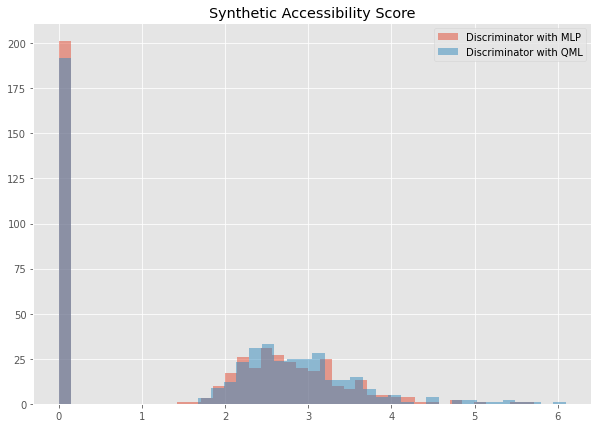

In [19]:
make_double_data_fig(data_ML,"Discriminator with MLP", data_QML,"Discriminator with QML")

In [20]:
def make_double_data_fig_save(input_data1,input_label1,input_data2,input_label2):
    data1 = input_data1
    label1 = input_label1
    data2 = input_data2
    label2 = input_label2
    
    kwargs = {
        "bins": 40,
        "histtype": "stepfilled",
        "alpha": 0.5
    }
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.hist(data1, label=label1, **kwargs)
    ax.hist(data2, label=label2, **kwargs)
    #ax.hist(data3, label="template", **kwargs)
    ax.set_title("Synthetic Accessibility Score")
    ax.legend()
    plt.savefig('SA.png', dpi=300)

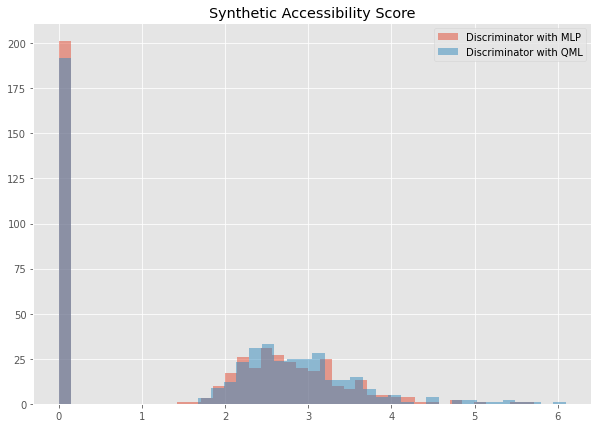

In [21]:
make_double_data_fig_save(data_ML,"Discriminator with MLP", data_QML,"Discriminator with QML")